# 다중선형회귀(2) - 보스턴 집값 예측

## #01. 준비작업

### [1] 패키지 참조

> 대부분의 기본 라이브러리는 start.py 파일에 의해 자동 초기화

### [2] 데이터 가져오기

| 필드 | 설명 |
|---|---|
| CRIM | 범죄율 |
| ZN | 25,000 평방피트를 초과 거주지역 비율 |
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우는 1, 아니면 0 |
| NOX | 일산화질소 농도 |
| RM | 주택당 방 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터의 거리 |
| RAD | 방사형 고속도로까지의 거리 |
| TAX | 재산세율 |
| PTRATIO | 학생/교사 비율 |
| B | 인구 중 흑인 비율 |
| LSTAT | 인구 중 하위 계층 비율 |
| MEDV | 집값 |
| CAT_MEDV | $3000 이상 여부 |

In [1]:
origin = read_excel("https://data.hossam.kr/mldata/boston.xlsx")
origin

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## #02. 데이터 전처리

### [1] 데이터 스케일링

> 이 부분은 `#03`을 먼저 수행하여 결과에 VIF값이 높음을 확인한 상태에서 진행

In [3]:
scaler = StandardScaler()
df = DataFrame(scaler.fit_transform(origin), index=origin.index, columns=origin.columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


> 참고
```
만약 데이터 스케일링을 x를 7:3으로 쪼갠 이후에 할 경우
scaler.fit_transform(x_train)
scaler.transform(x_test)
으로 하나의 식이 둘 모두에게 적용되게 해야 함. (두 식의 스케일이 다를경우, 비교가 의미가 없어짐)
식이 헷갈릴 경우, 데이터스케일링을 분할 이전에 하도록 하자. 
```

## #03. 선형회귀를 위한 일괄 처리 코드 구현

(354,) [-7.68076694e-01  5.79566058e-01  1.87041638e+00 -4.99225427e-01
  8.33870568e-01  1.63014292e+00  2.90826640e-01 -1.22331021e+00
 -9.35953983e-01  1.04213848e+00  6.50919398e-01 -3.73353544e-01
 -9.10285423e-01  8.77885886e-01 -6.11139353e-01 -1.04221665e-01
 -2.13674662e-01  1.68764247e+00 -4.62331533e-01 -7.71467392e-01
 -9.34922456e-01  3.90966467e-02  1.14824517e+00  1.77673534e+00
  8.03729220e-01 -2.09517533e-02 -5.06317288e-01 -2.03848190e-01
  9.18691234e-02 -2.19809202e-01  3.54092172e-01  1.22992795e+00
 -7.83790908e-01 -8.06695263e-02  1.75333003e-01  1.37982847e+00
  7.25969798e-01 -4.31682231e-01 -9.32793737e-01  1.75251344e+00
  9.41271884e-01 -3.72573836e-01 -3.70636226e-01  1.87363603e+00
 -1.48753162e+00  5.16728272e-01 -3.79630060e-01  3.17362051e-01
 -7.65349664e-01  3.96495597e-01  1.21494244e+00  2.03356559e-01
 -3.41603713e-01 -1.08614370e+00  2.14608187e-01 -4.69515250e-01
 -1.29541472e+00 -2.20352338e+00  1.00020089e+00 -9.87074351e-01
 -2.65365926e-01 -

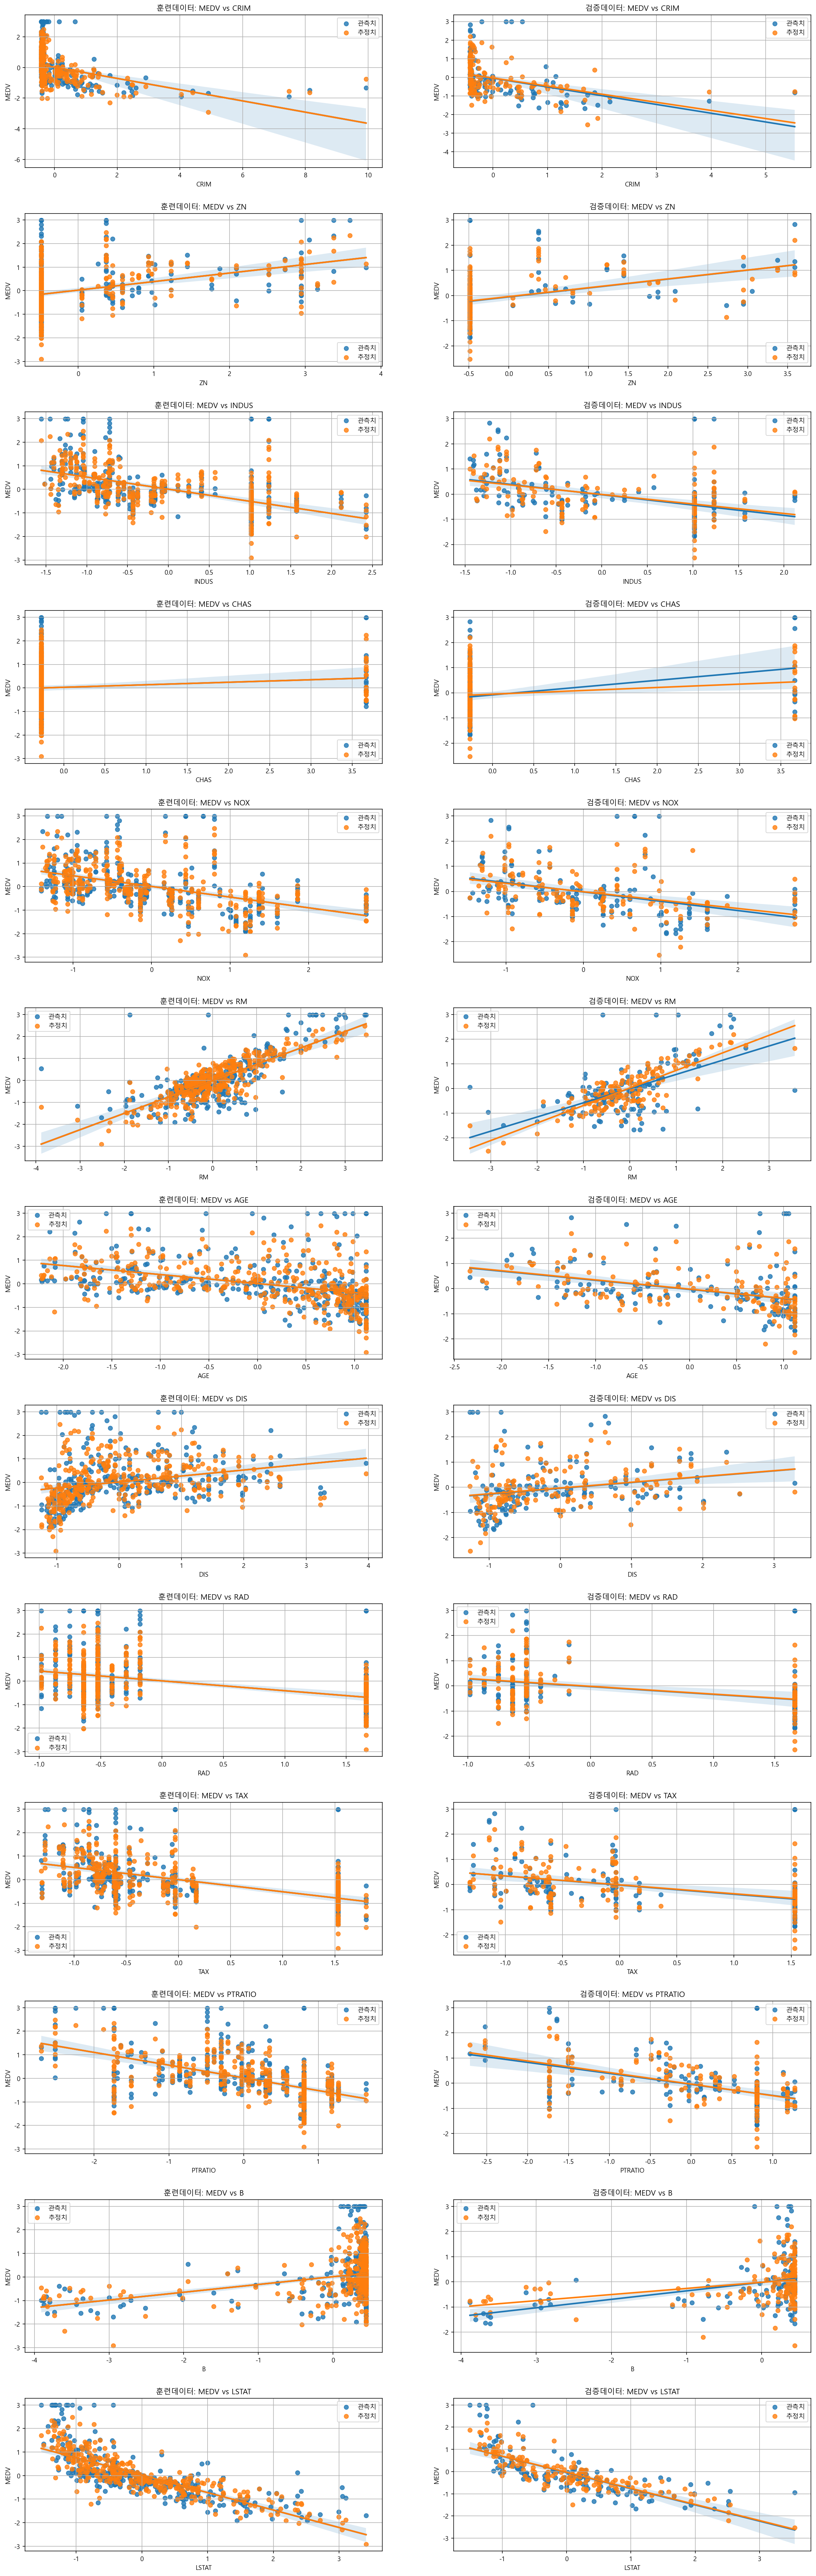

[성능지표]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |     0.764716 |     0.648565 |
| 평균절대오차(MAE)             |      0.33979 |     0.401759 |
| 평균제곱오차(MSE)             |     0.239096 |     0.336484 |
| 평균오차(RMSE)                |     0.488974 |     0.580073 |
| 평균 절대 백분오차 비율(MAPE) |      283.111 |      186.995 |
| 평균 비율 오차(MPE)           |     -7.88318 |      35.6707 |
+-------------------------------+--------------+--------------+

[회귀식]
MEDV = -0.094 * CRIM + 0.101 * ZN + 0.056 * INDUS + 0.007 * CHAS + -0.181 * NOX + 0.369 * RM + -0.023 * AGE + -0.304 * DIS + 0.259 * RAD + -0.239 * TAX + -0.225 * PTRATIO + 0.064 * B + -0.378 * LSTAT + 0.004

[훈련데이터에 대한 결과보고]
+----+------------+------------+--------------------+------------+------------------+--------+------------+---------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |

In [4]:
# --------------------------------
# 데이터 분할
# --------------------------------
yname = 'MEDV'
x = df.drop('MEDV', axis=1)
y = df[yname]
xnames = list(x.columns)
#print(xnames)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
#print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# --------------------------------
# 회귀분석
# --------------------------------
# 분석모델 생성
model = LinearRegression(n_jobs=-1)
fit = model.fit(x_train, y_train)



# --------------------------------
# 훈련, 검증 데이터에 대한 예측치
# --------------------------------
y_train_pred = fit.predict(x_train)
y_test_pred = fit.predict(x_test)
print(y_train_pred.shape, y_test_pred)

# 반복 수행을 위해 훈련/검증 데이터를 하나로 묶음
target = [[x_train, y_train, y_train_pred], [x_test, y_test, y_test_pred]]

# 성능지표 저장용 리스트
result_data = []

# --------------------------------
# 시각화 및 성능지표 계산
# --------------------------------
# 시각화 시작
print("[훈련결과 시각화]")
size = len(xnames)

# 서브플롯에서 바깥의 반복문이 열(i)을 담당하도록 구성 (반복문 하나 그냥 낭비하기 싫어서 그래프 그릴 때 씀)
fig, ax = plt.subplots(len(xnames), 2, figsize=(20, 5*size), dpi=150)
fig.subplots_adjust(hspace=0.3)

for i, v in enumerate(target):
    result = {
        "결정계수(R2)": r2_score(v[1], v[2]),
        "평균절대오차(MAE)": mean_absolute_error(v[1], v[2]),
        "평균제곱오차(MSE)": mean_squared_error(v[1], v[2]),
        "평균오차(RMSE)": np.sqrt(mean_squared_error(v[1], v[2])),
        "평균 절대 백분오차 비율(MAPE)": np.mean(np.abs((v[1] - v[2]) / v[1]) * 100),
        "평균 비율 오차(MPE)": np.mean((v[1] - v[2]) / v[1] * 100)
    }
    
    result_data.append(result)
    
    # 서브플롯에서 바깥의 반복문이 열(i)을 담당하도록 구성하였으므로, 내부 반복문은 행(변수 종류별,j)을 담당
    for j, w in enumerate(xnames):
        sb.regplot(x=v[0][w], y=v[1], ci=95, ax=ax[j][i], label='관측치')
        sb.regplot(x=v[0][w], y=v[2], ci=0, ax=ax[j][i], label='추정치')
        ax[j][i].set_title(f"훈련데이터: {yname} vs {w}" if i == 0 else f"검증데이터: {yname} vs {w}")
        ax[j][i].legend()
        ax[j][i].grid(True)

plt.show()
plt.close()

result_df = DataFrame(result_data, index=["훈련데이터", "검증데이터"])
print("[성능지표]")
print(tabulate(result_df.T, headers='keys', tablefmt='psql', showindex=True, numalign="right"), end="\n\n")

# --------------------------------
# 회귀식
# --------------------------------
expr = "{yname} = ".format(yname=yname)

for i, v in enumerate(xnames):
    expr += "%0.3f * %s + " % (fit.coef_[i], v)

expr += "%0.3f" % fit.intercept_
print("[회귀식]")
print(expr, end="\n\n")

# --------------------------------
# 결과보고
# --------------------------------
for i, v in enumerate(target):
    print("[훈련데이터에" if i == 0 else "[검증데이터에", "대한 결과보고]")
    
    target_x = v[0]
    target_y = v[1]
    target_y_pred = v[2]
    
    # 잔차
    resid = target_y - target_y_pred

    # 절편과 계수를 하나의 배열로 결합
    params = np.append(fit.intercept_, fit.coef_)

    # 검증용 독립변수에 상수항 추가
    design_x = target_x.copy()
    design_x.insert(0, '상수', 1)

    dot = np.dot(design_x.T,design_x)   # 행렬곱
    inv = np.linalg.inv(dot)            # 역행렬
    dia = inv.diagonal()                # 대각원소

    # 제곱오차
    MSE = (sum((target_y-target_y_pred)**2)) / (len(design_x)-len(design_x.iloc[0]))

    se_b = np.sqrt(MSE * dia)           # 표준오차
    ts_b = params / se_b                # t값

    # 각 독립수에 대한 pvalue
    p_values = [2*(1-t.cdf(np.abs(i),(len(design_x)-len(design_x.iloc[0])))) for i in ts_b]

    # VIF
    vif = [variance_inflation_factor(target_x, list(target_x.columns).index(v)) for i, v in enumerate(target_x.columns)]

    # 표준화 계수
    train_df = target_x.copy()
    train_df[target_y.name] = target_y
    scaler = StandardScaler()
    std = scaler.fit_transform(train_df)
    std_df = DataFrame(std, columns=train_df.columns)
    std_x = std_df[xnames]
    std_y = std_df[yname]
    std_model = LinearRegression()
    std_fit = std_model.fit(std_x, std_y)
    beta = std_fit.coef_

    # 결과표 구성하기
    result_df = DataFrame({
        "종속변수": [yname] * len(xnames),
        "독립변수": xnames,
        "B(비표준화 계수)": np.round(params[1:], 4),
        "표준오차": np.round(se_b[1:], 3),
        "β(표준화 계수)": np.round(beta, 3),
        "t": np.round(ts_b[1:], 3),
        "유의확률": np.round(p_values[1:], 3),
        "VIF": vif,
    })

    #result_df
    print(tabulate(result_df, headers='keys', tablefmt='psql', showindex=True), end="\n\n")

    resid = target_y - target_y_pred        # 잔차
    dw = durbin_watson(resid)               # 더빈 왓슨 통계량
    r2 = r2_score(target_y, target_y_pred)  # 결정계수(설명력)
    rowcount = len(target_x)                # 표본수
    featurecount = len(target_x.columns)    # 독립변수의 수

    # 보정된 결정계수
    adj_r2 = 1 - (1 - r2) * (rowcount-1) / (rowcount-featurecount-1)

    # f값
    f_statistic = (r2 / featurecount) / ((1 - r2) / (rowcount - featurecount - 1))

    # Prob (F-statistic)
    p = 1 - f.cdf(f_statistic, featurecount, rowcount - featurecount - 1)

    tpl = "𝑅^2(%.3f), Adj.𝑅^2(%.3f), F(%.3f), P-value(%.4g), Durbin-Watson(%.3f)"
    print(tpl % (r2, adj_r2, f_statistic, p, dw), end="\n\n")

    # 결과보고
    tpl = "%s에 대하여 %s로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 %s(F(%s,%s) = %0.3f, p %s 0.05)."

    print(tpl % (
        yname,
        ",".join(xnames),
        "유의하다" if p <= 0.05 else "유의하지 않다",
        len(target_x.columns),
        len(target_x.index)-len(target_x.columns)-1,
        f_statistic,
        "<=" if p <= 0.05 else ">"), end="\n\n")

    # 독립변수 보고
    for n in xnames:
        item = result_df[result_df['독립변수'] == n]
        coef = item['B(비표준화 계수)'].values[0]
        pvalue = item['유의확률'].values[0]

        s = "%s의 회귀계수는 %0.3f(p %s 0.05)로, %s에 대하여 %s."
        k = s % (n,
                coef,
                "<=" if pvalue <= 0.05 else '>',
                yname,
                '유의미한 예측변인인 것으로 나타났다' if pvalue <= 0.05 else '유의하지 않은 예측변인인 것으로 나타났다'
        )

        print(k)
        
    print("")
    
